# Data Exploration

Imports:

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import r2_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.linear_model import SGDClassifier

import re # Regular expression 
from langdetect import detect #Language detection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import nltk
from wordcloud import WordCloud


Loading file:

In [22]:
df = pd.read_csv("total_data.csv")

Dataframe description:

In [23]:
df.describe(include='all')

,id,likes,following,followers,posts_amount,celeb,pic_vid,hashtag,hashtag_amount,pCo,content,post_date,curr_date,predict
count,11113,1.036500e+04,10509.000000,1.050900e+04,10509.000000,11113.000000,11113.000000,9263,11113.000000,10481,11088,11111,11113,9808.000000
unique,10249,NaN,NaN,NaN,NaN,NaN,NaN,8122,NaN,8342,9554,215,22,NaN
top,Cd3IHD_KmBW,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,text,,1h,06/06/2022,NaN
freq,9,NaN,NaN,NaN,NaN,NaN,NaN,139,NaN,179,606,1205,1141,NaN
mean,NaN,9.717736e+03,1201.794081,8.093296e+04,1334.813113,0.027535,0.172861,NaN,16.945559,NaN,NaN,NaN,NaN,0.133666
std,NaN,2.466031e+05,1674.326973,3.297725e+05,2775.201195,0.163645,0.378144,NaN,11.433369,NaN,NaN,NaN,NaN,0.340311
min,NaN,2.000000e+00,0.000000,1.000000e+00,1.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,NaN,2.110000e+02,181.000000,4.154000e+03,194.000000,0.000000,0.000000,NaN,6.000000,NaN,NaN,NaN,NaN,0.000000
50%,NaN,5.780000e+02,587.000000,1.450000e+04,524.000000,0.000000,0.000000,NaN,19.000000,NaN,NaN,NaN,NaN,0.000000
75%,NaN,1.924000e+03,1344.000000,5.490000e+04,1366.000000,0.000000,0.000000,NaN,28.000000,NaN,NaN,NaN,NaN,0.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11113 non-null  object 
 1   likes           10365 non-null  float64
 2   following       10509 non-null  float64
 3   followers       10509 non-null  float64
 4   posts_amount    10509 non-null  float64
 5   celeb           11113 non-null  int64  
 6   pic_vid         11113 non-null  int64  
 7   hashtag         9263 non-null   object 
 8   hashtag_amount  11113 non-null  int64  
 9   pCo             10481 non-null  object 
 10  content         11088 non-null  object 
 11  post_date       11111 non-null  object 
 12  curr_date       11113 non-null  object 
 13  predict         9808 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 1.2+ MB


In [25]:
df.columns

Index(['id', 'likes', 'following', 'followers', 'posts_amount', 'celeb',
       'pic_vid', 'hashtag', 'hashtag_amount', 'pCo', 'content', 'post_date',
       'curr_date', 'predict'],
      dtype='object')

In [26]:
df_numeric = df.select_dtypes(include='number')
df_numeric

,likes,following,followers,posts_amount,celeb,pic_vid,hashtag_amount,predict
0,407.0,867.0,32400.0,792.0,0,1,2,0.0
1,697.0,450.0,40600.0,125.0,0,0,0,0.0
2,928.0,234.0,5910.0,105.0,0,0,0,0.0
3,22607.0,6.0,166000.0,2124.0,0,0,0,0.0
4,1239.0,676.0,6542.0,40.0,0,0,6,0.0
...,...,...,...,...,...,...,...,...
11108,700.0,2.0,4872.0,1047.0,0,0,0,0.0
11109,4202.0,257.0,33000.0,407.0,0,1,28,0.0
11110,445.0,92.0,26100.0,80.0,0,1,14,0.0
11111,1514.0,1.0,919000.0,2608.0,0,0,22,0.0


Data clean:

In [27]:
df.shape

(11113, 14)

In [28]:
df.drop_duplicates("id",keep='last', inplace=True)

In [29]:
df.dropna(inplace=True)

In [30]:
# check if text is in english if not, drop row
for index,row in df.iterrows():
        try:
                if detect(row['content']) != 'en':
                        df.drop(index, inplace=True)                
        except:
                pass

In [31]:
# clean text from hashtag
for index,row in df.iterrows():
        text = row['content']
        if '#' in text:
                clean_text = text.replace('#', ' ')
                df.at[index,'content'] = clean_text

In [32]:
df.shape

(4417, 14)

In [33]:
df['predict'].value_counts()

0.0    3877
1.0     540
Name: predict, dtype: int64

As we can see, we don't have much successful posts, so we need to manipulate the data manually:

In [34]:
# changing the definition of success
#   for w we will check for 0.3 likes/followers ratio
#   for d we will check for 0.25 likes/followers ratio
#   for h we will check for 0.2 likes/followers ratio
#   for m we will check for 0.15 likes/followers ratio
for index,row in df.iterrows():
        if 'd' in row['content']:
            if row['likes']/row['followers'] > 0.20:
                df.at[index,'predict'] = 1

        elif 'h' in row['content']:
            if row['likes']/row['followers'] > 0.15:
                df.at[index,'predict'] = 1

        elif 'm' in row['content']:
            if row['likes']/row['followers'] > 0.10:
                df.at[index,'predict'] = 1

In [35]:
df['predict'].value_counts()

0.0    3634
1.0     783
Name: predict, dtype: int64

In [36]:
# we will duplicate the rows with prediction '1' to balance with '0'
df_duplicate = df.copy()
for i in range(1,3):
    for index, row in df.iterrows():
        if row['predict'] == 1:
            df_duplicate = df_duplicate.append(row)
            #df_duplicate = pd.concat([df_duplicate, row], ignore_index=True)
df_duplicate.shape

C:\Users\orenp\AppData\Local\Temp\ipykernel_13244\459244002.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate = df_duplicate.append(row)
C:\Users\orenp\AppData\Local\Temp\ipykernel_13244\459244002.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate = df_duplicate.append(row)
C:\Users\orenp\AppData\Local\Temp\ipykernel_13244\459244002.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate = df_duplicate.append(row)
C:\Users\orenp\AppData\Local\Temp\ipykernel_13244\459244002.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate = df_duplicate.append(row)
C:\Users\orenp\AppData\Local\Temp\ip

(5983, 14)

In [37]:
df_duplicate['predict'].value_counts()

0.0    3634
1.0    2349
Name: predict, dtype: int64

# Now we will start with the EDA

let's see if we have correlations between the columns:

In [38]:
df_dup_numeric = df_duplicate.select_dtypes(include='number')
df_dup_numeric

,likes,following,followers,posts_amount,celeb,pic_vid,hashtag_amount,predict
13,27418.0,70.0,53000.0,789.0,0,0,30,1.0
19,252.0,1018.0,263000.0,11950.0,0,0,22,0.0
22,144.0,569.0,23100.0,672.0,0,0,30,0.0
28,310.0,496.0,33100.0,269.0,0,0,13,0.0
30,180.0,1608.0,5798.0,561.0,0,0,31,0.0
...,...,...,...,...,...,...,...,...
11006,1108.0,88.0,3663.0,399.0,0,0,30,1.0
11012,4023.0,146.0,11700.0,263.0,0,1,32,1.0
11060,67499.0,178.0,66300.0,591.0,0,1,20,1.0
11063,8001.0,3123.0,1783.0,268.0,0,1,30,1.0


In [39]:
corr = df_dup_numeric.corr()
corr.style.background_gradient(cmap='coolwarm')

,likes,following,followers,posts_amount,celeb,pic_vid,hashtag_amount,predict
likes,1.000000,-0.013005,0.074987,-0.006209,0.011127,0.211689,-0.018949,0.162209
following,-0.013005,1.000000,-0.073879,0.091817,-0.006724,-0.079219,0.058680,-0.159886
followers,0.074987,-0.073879,1.000000,0.312422,0.244049,0.106329,-0.099339,-0.149152
posts_amount,-0.006209,0.091817,0.312422,1.000000,0.161852,0.039484,-0.088449,-0.159539
celeb,0.011127,-0.006724,0.244049,0.161852,1.000000,0.022923,-0.149760,-0.062347
pic_vid,0.211689,-0.079219,0.106329,0.039484,0.022923,1.000000,-0.033885,0.342457
hashtag_amount,-0.018949,0.058680,-0.099339,-0.088449,-0.149760,-0.033885,1.000000,0.013619
predict,0.162209,-0.159886,-0.149152,-0.159539,-0.062347,0.342457,0.013619,1.000000


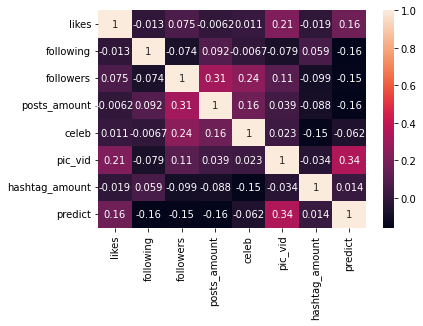

In [40]:
# plot the correlation matrix
sns.heatmap(df_dup_numeric.corr(), annot=True)
plt.show()

([<matplotlib.patches.Wedge at 0x1d43a435480>,
 [Text(-0.36410517704661133, 1.0379920134798033, 'No'),
  Text(0.3641051770466107, -1.0379920134798035, 'Yes')],
 [Text(-0.19860282384360614, 0.5661774618980744, '60.7%'),
  Text(0.1986028238436058, -0.5661774618980745, '39.3%')])

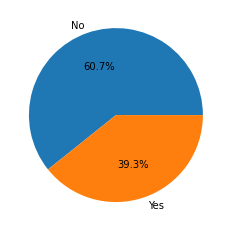

In [41]:
plt.pie(df_dup_numeric['predict'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')

In [42]:
df_dup_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5983 entries, 13 to 11064
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   likes           5983 non-null   float64
 1   following       5983 non-null   float64
 2   followers       5983 non-null   float64
 3   posts_amount    5983 non-null   float64
 4   celeb           5983 non-null   int64  
 5   pic_vid         5983 non-null   int64  
 6   hashtag_amount  5983 non-null   int64  
 7   predict         5983 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 420.7 KB


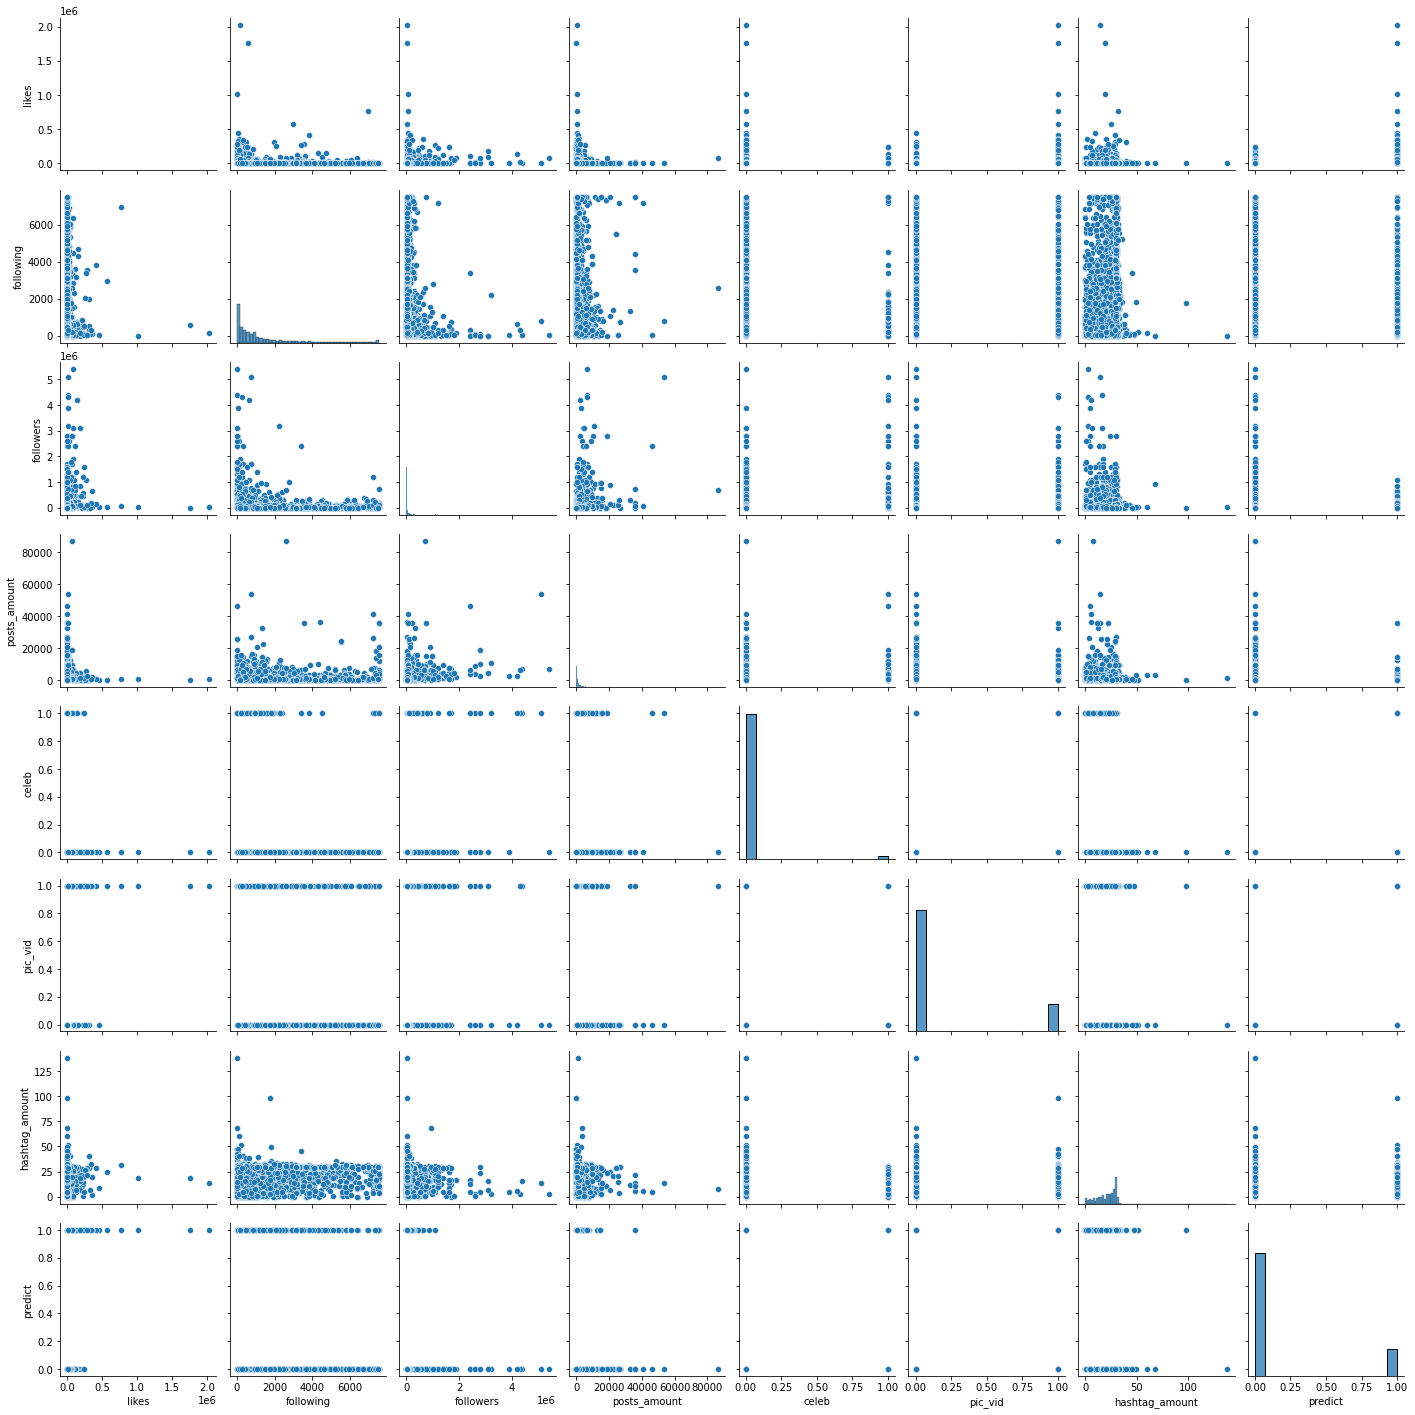

In [43]:
sns.pairplot(df[['likes','following','followers','posts_amount','celeb','pic_vid','hashtag_amount','predict']])

<AxesSubplot:xlabel='posts_amount', ylabel='followers'>

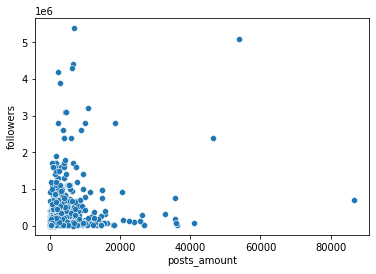

In [44]:
sns.scatterplot(data=df_dup_numeric, x="posts_amount", y="followers")

<AxesSubplot:xlabel='celeb', ylabel='followers'>

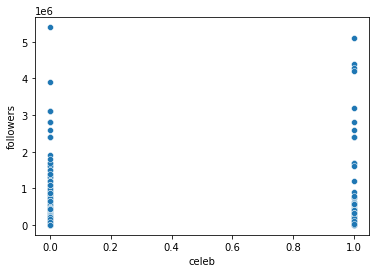

In [45]:
sns.scatterplot(data=df_dup_numeric, x="celeb", y="followers")

<AxesSubplot:xlabel='likes', ylabel='pic_vid'>

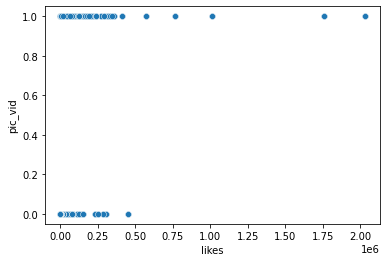

In [46]:
sns.scatterplot(data=df_dup_numeric, x="likes", y="pic_vid")

<AxesSubplot:xlabel='likes', ylabel='followers'>

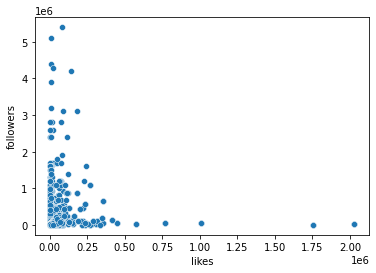

In [47]:
sns.scatterplot(data=df_dup_numeric, x="likes", y="followers")

<AxesSubplot:xlabel='posts_amount', ylabel='celeb'>

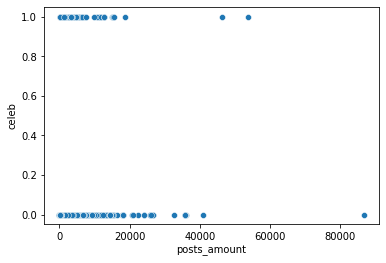

In [48]:
sns.scatterplot(data=df_dup_numeric, x="posts_amount", y="celeb")

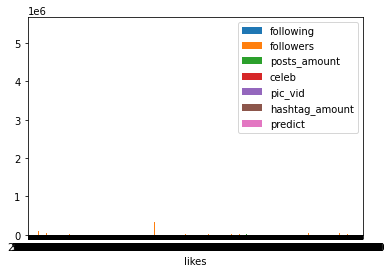

In [116]:
ax = df_duplicate.plot.bar(x='likes', rot=0)

LogisticRegression:
+ Split the data to train and test

In [59]:
X = df_duplicate.copy()
y = df_duplicate['predict']
X.drop(['id','content','pCo','content','post_date','curr_date','predict', 'hashtag', 'likes'], axis=1, inplace=True) # drop everything not numerical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [60]:
# standard scaler
standard_scaler = StandardScaler()
X_train_stand_scaled = standard_scaler.fit_transform(X_train)
X_test_stand_scaled = standard_scaler.fit_transform(X_test)

In [61]:
model_stand = LogisticRegression(random_state=0).fit(X_train_stand_scaled, y_train)
y_predict_stand = model_stand.predict(X_test)
standard_score = f1_score(y_test, y_predict_stand)
print("standard score: %.2f" % standard_score)

standard score: 0.00


c:\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [62]:
y_pred = model_stand.predict(X_test)
redDF = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
print(redDF)

       Actual  Predicted
5740      1.0        0.0
1087      0.0        0.0
358       0.0        0.0
7467      1.0        0.0
10705     1.0        0.0
...       ...        ...
3000      1.0        0.0
5427      0.0        0.0
6355      0.0        0.0
6402      1.0        0.0
7158      0.0        0.0

[1795 rows x 2 columns]


c:\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [63]:
model_stand.predict(X_test)

c:\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0., 0., 0., ..., 0., 0., 0.])

In [64]:
# measure of the test's accuracy and precision
f1_score(y_test, y_pred)

0.0

In [65]:
# the score means that the the two variables are perfectly correlated if 100%
r2_score(y_test, y_pred)

-0.6377737226277373

RandomForestRegressor:
+ first we find best num estimator

In [66]:
parameters = {'n_estimators':[11, 51, 71]}
forest = RandomForestClassifier()
clf = GridSearchCV(forest, parameters, cv=10, scoring=make_scorer(metrics.f1_score))
model_forest = clf.fit(X_train, y_train)

y_forest_train_predict = model_forest.predict(X_train)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = y_train, y_pred = y_forest_train_predict))

y_forest_test_predict = model_forest.predict(X_test)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = y_test, y_pred = y_forest_test_predict))


Accuracy on training data=  0.9959407831900668
Accuracy on test data=  0.9203342618384401


SVM algorithm:

In [67]:
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)
y_svm_train_predict = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_svm_train_predict))

Accuracy: 0.7091922005571031


In [68]:
print("Precision:",metrics.precision_score(y_test, y_svm_train_predict))
print("Recall:",metrics.recall_score(y_test, y_svm_train_predict))

Precision: 0.6617915904936015
Recall: 0.5178826895565093


# Now we will do some text exploration

In [69]:
def convert_list_to_text(list):
    lines = []
    for line in list:
        line = line.strip().lower()
        if len(line)==0:
            continue
        lines.append(line)
    text = " ".join(lines)
    return text

In [70]:
# hashtag
hashtag_text = convert_list_to_text(df_duplicate['hashtag'].to_list())
vectorizer_hashtag = CountVectorizer(lowercase=True,stop_words="english",max_features=100)
freq_vec_hashtag = vectorizer_hashtag.fit_transform([hashtag_text]).toarray()
freqDistHashtag = dict(zip(vectorizer_hashtag.get_feature_names_out(),freq_vec_hashtag[0]))
freqDistHashtag=dict(sorted(freqDistHashtag.items(), key=lambda item: item[1],reverse=True)) # ascending sort..

# content
content_text = convert_list_to_text(df_duplicate['content'].to_list())
vectorizer_content = CountVectorizer(lowercase=True,stop_words="english",max_features=100)
freq_vec_content = vectorizer_content.fit_transform([content_text]).toarray()
freqDistcontent = dict(zip(vectorizer_content.get_feature_names_out(),freq_vec_content[0]))
freqDistcontent=dict(sorted(freqDistcontent.items(), key=lambda item: item[1],reverse=True)) # ascending sort..

# pCo
pCo_text = convert_list_to_text(df_duplicate['pCo'].to_list())
vectorizer_pCo = CountVectorizer(lowercase=True,stop_words="english",max_features=100)
freq_vec_pCo = vectorizer_pCo.fit_transform([pCo_text]).toarray()
freqDistpCo = dict(zip(vectorizer_pCo.get_feature_names_out(),freq_vec_pCo[0]))
freqDistpCo=dict(sorted(freqDistpCo.items(), key=lambda item: item[1],reverse=True)) # ascending sort..

Word distribution plot

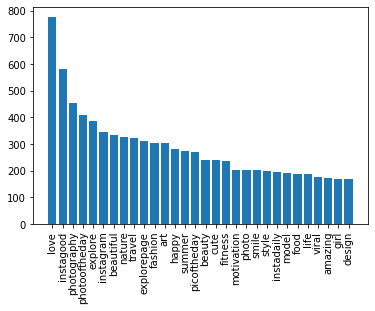

In [71]:
# hashtag
topK=30
plt.bar(list(freqDistHashtag.keys())[:topK], list(freqDistHashtag.values())[:topK])
plt.xticks(list(freqDistHashtag.keys())[:topK], rotation='vertical')
plt.show()

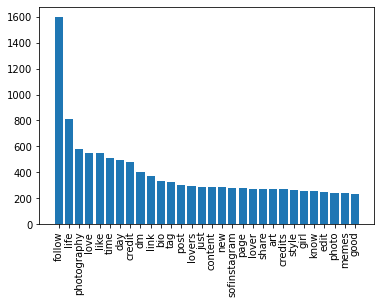

In [72]:
# content
topK=30
plt.bar(list(freqDistcontent.keys())[:topK], list(freqDistcontent.values())[:topK])
plt.xticks(list(freqDistcontent.keys())[:topK], rotation='vertical')
plt.show()

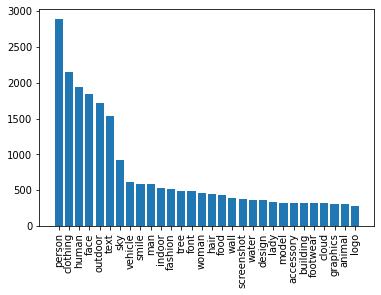

In [73]:
# pCo
topK=30
plt.bar(list(freqDistpCo.keys())[:topK], list(freqDistpCo.values())[:topK])
plt.xticks(list(freqDistpCo.keys())[:topK], rotation='vertical')
plt.show()

WordCloud

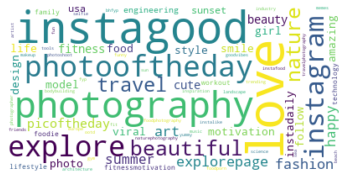

In [74]:
# hashtag
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=60, max_words=75, background_color="white").generate_from_frequencies(freqDistHashtag)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

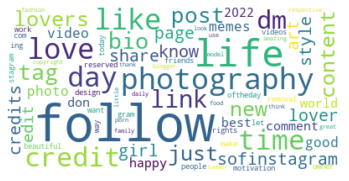

In [75]:
# content
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=60, max_words=75, background_color="white").generate_from_frequencies(freqDistcontent)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

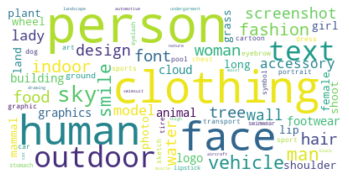

In [76]:
# pCo
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=60, max_words=75, background_color="white").generate_from_frequencies(freqDistpCo)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Text processing - Text Classification

In [99]:
#train the model with hashtag
X_train_counts = vectorizer_hashtag.fit_transform(df_duplicate['hashtag'])
X_train_normalized = preprocessing.normalize(X_train_counts, norm='l1')
clf = MultinomialNB().fit(X_train_normalized, df_duplicate['predict'])

In [100]:
text_clf_nb_hashtag = Pipeline([
    ('vect', CountVectorizer(stop_words="english",max_features=1000)),
    ('norm', preprocessing.Normalizer(norm='l1')),
    ('clf', MultinomialNB()),
])
text_clf_nb_hashtag.fit(df_duplicate['hashtag'], df_duplicate['predict'])

Pipeline(steps=[('vect',
                 CountVectorizer(max_features=1000, stop_words='english')),
                ('norm', Normalizer(norm='l1')), ('clf', MultinomialNB())])

In [101]:
predicted = text_clf_nb_hashtag.predict(df_duplicate['hashtag'])
np.mean(predicted == df_duplicate['predict'])

0.7138559251211767

We achieved 71.4% accuracy. Let’s see if we can do better with a linear support vector machine (SVM), which is widely regarded as one of the best text classification algorithms (although it’s also a bit slower than naïve Bayes). We can change the learner by simply plugging a different classifier object into our pipeline:

In [102]:
text_clf_svm_hashtag = Pipeline([
    ('vect', CountVectorizer(stop_words="english",max_features=1000)),
    ('norm', preprocessing.Normalizer(norm='l1')),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                          max_iter=5, tol=None)),
])

text_clf_svm_hashtag.fit(df_duplicate['hashtag'], df_duplicate['predict'])

predicted_hashtag = text_clf_svm_hashtag.predict(df_duplicate['hashtag'])
np.mean(predicted_hashtag == df_duplicate['predict'])

0.6261073040280796

In [103]:
#train the model with content
X_train_counts = vectorizer_content.fit_transform(df_duplicate['content'])
X_train_normalized = preprocessing.normalize(X_train_counts, norm='l1')
clf = MultinomialNB().fit(X_train_normalized, df_duplicate['predict'])

In [104]:
text_clf_nb_content = Pipeline([
    ('vect', CountVectorizer(stop_words="english",max_features=1000)),
    ('norm', preprocessing.Normalizer(norm='l1')),
    ('clf', MultinomialNB()),
])
text_clf_nb_content.fit(df_duplicate['content'], df_duplicate['predict'])

Pipeline(steps=[('vect',
                 CountVectorizer(max_features=1000, stop_words='english')),
                ('norm', Normalizer(norm='l1')), ('clf', MultinomialNB())])

In [105]:
predicted_content = text_clf_nb_content.predict(df_duplicate['content'])
np.mean(predicted_content == df_duplicate['predict'])

0.6715694467658365

In [106]:
text_clf_svm_content = Pipeline([
    ('vect', CountVectorizer(stop_words="english",max_features=1000)),
    ('norm', preprocessing.Normalizer(norm='l1')),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                          max_iter=5, tol=None)),
])

text_clf_svm_content.fit(df_duplicate['content'], df_duplicate['predict'])

predicted = text_clf_svm_content.predict(df_duplicate['content'])
np.mean(predicted == df_duplicate['predict'])

0.6129032258064516

In [107]:
#train the model with pCo
X_train_counts = vectorizer_pCo.fit_transform(df_duplicate['pCo'])
X_train_normalized = preprocessing.normalize(X_train_counts, norm='l1')
clf = MultinomialNB().fit(X_train_normalized, df_duplicate['predict'])

In [108]:
text_clf_nb_pCo = Pipeline([
    ('vect', CountVectorizer(stop_words="english",max_features=1000)),
    ('norm', preprocessing.Normalizer(norm='l1')),
    ('clf', MultinomialNB()),
])
text_clf_nb_pCo.fit(df_duplicate['pCo'], df_duplicate['predict'])

Pipeline(steps=[('vect',
                 CountVectorizer(max_features=1000, stop_words='english')),
                ('norm', Normalizer(norm='l1')), ('clf', MultinomialNB())])

In [109]:
predicted_pCo = text_clf_nb_pCo.predict(df_duplicate['pCo'])
np.mean(predicted_pCo == df_duplicate['predict'])

0.6344643155607554

In [110]:
text_clf_svm_pCo = Pipeline([
    ('vect', CountVectorizer(stop_words="english",max_features=1000)),
    ('norm', preprocessing.Normalizer(norm='l1')),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                          max_iter=5, tol=None)),
])

text_clf_svm_pCo.fit(df_duplicate['pCo'], df_duplicate['predict'])

predicted = text_clf_svm_pCo.predict(df_duplicate['pCo'])
np.mean(predicted == df_duplicate['predict'])

0.6115661039612235